# Make Predictions with Linear Regression

This recipe shows how to perform linear regression on your data. You can either play around using the provided Boston housing data ([source](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)) or you can load your own data and make the necessary changes in `input_cols` and `output_col`. For the linear regression itself, you will use the `LinearRegression` functionality from the `scikit-learn` package.

In [9]:
# Load packages
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [10]:
# Load data from the csv file
df = pd.read_csv("housing_data.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [11]:
# Understand the variables
pd.options.display.max_colwidth = 100
pd.read_csv('variable_explanation.csv', index_col=0)

,Explanation
Variable,
CRIM,The crime rate per capita
ZN,The proportion of residential land zoned for lots over 25000 sq.ft
INDUS,The proportion of non-retail business acres per town
CHAS,The Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX,The nitric oxides concentration (parts per 10 million)
RM,The average number of rooms per dwelling
AGE,The proportion of owner-occupied units built prior to 1940
DIS,The weighted distances to five Boston employment centres
RAD,The index of accessibility to radial highways


In [12]:
# Split the data into X and y
# You can adapt the input and output columns to fit your own data
input_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
output_col = ['PRICE']
X = df[input_cols]
y = df[output_col]

# Split the data into training and test data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 44)

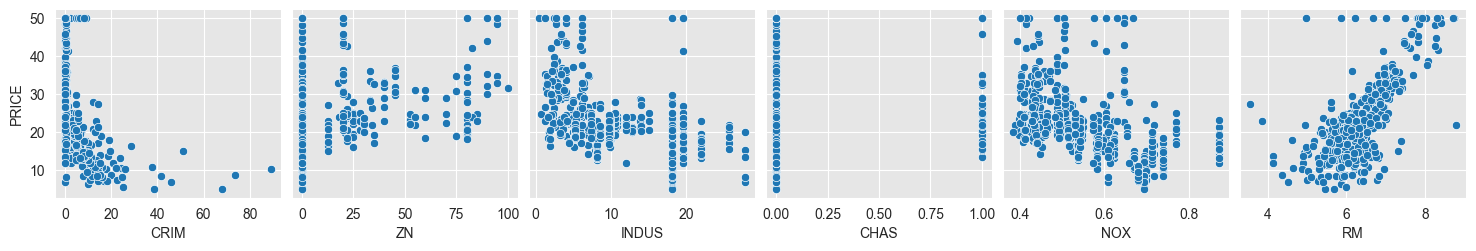

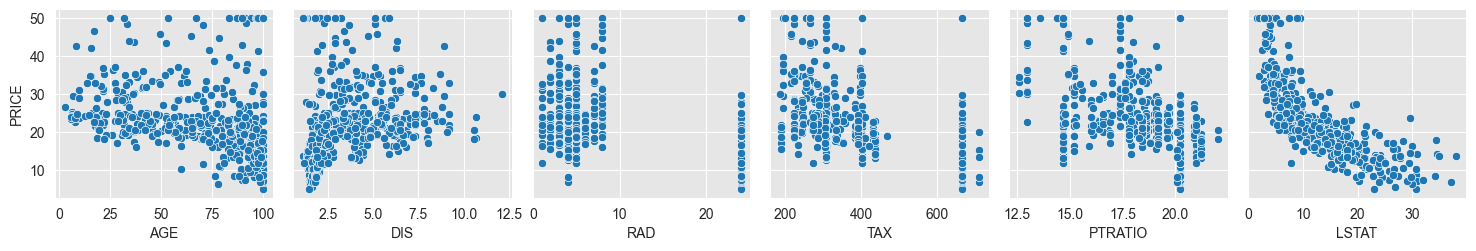

In [13]:
# Make two figures so it is better visualized
half = len(input_cols)//2

fig1=sns.pairplot(
    df,
    x_vars=input_cols[:half],
    y_vars=output_col
)

fig2=sns.pairplot(
    df,
    x_vars=input_cols[half:],
    y_vars=output_col
)

In [14]:
# Function to flatten 2D lists so it can be used by plotly
def flatten(l):
    return [item for sublist in l for item in sublist]

# Set up and fit the linear regressor
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Flatten the prediction and expected lists
predicted = flatten(lin_reg.predict(X_test))
expected = flatten(y_test.values)

In [6]:
%matplotlib inline
# Import plotting package
import plotly.express as px
import pandas as pd  # Import pandas

# Define the expected and predicted data
expected = [1, 2, 3, 4, 5]  # Example data for expected values
predicted = [1.1, 1.9, 3.2, 3.8, 5.1]  # Example data for predicted values

# Put data to plot in dataframe
df_plot = pd.DataFrame({'expected': expected, 'predicted': predicted})

# Make scatter plot from data
fig = px.scatter(
    df_plot, 
    x='expected', 
    y='predicted',
    title='Predicted vs. Actual Values',
    labels={'expected': 'Actual Values', 'predicted': 'Predicted Values'}
)

# Add straight line indicating perfect model
fig.add_shape(type="line",
    x0=min(df_plot['expected']), y0=min(df_plot['expected']), 
    x1=max(df_plot['expected']), y1=max(df_plot['expected']),
    line=dict(
        color="Red",
        width=2,
        dash="dot",
    )
)

# Show figure
fig.show()

In [16]:
# Print the root mean square error (RMS)
error = np.sqrt(np.mean((np.array(predicted) - np.array(expected)) ** 2))
print(f"RMS: {error:.4f} ")

r2=r2_score(expected, predicted)
print(f"R2: {round(r2,4)}") 

RMS: 4.6650 
R2: 0.7495
